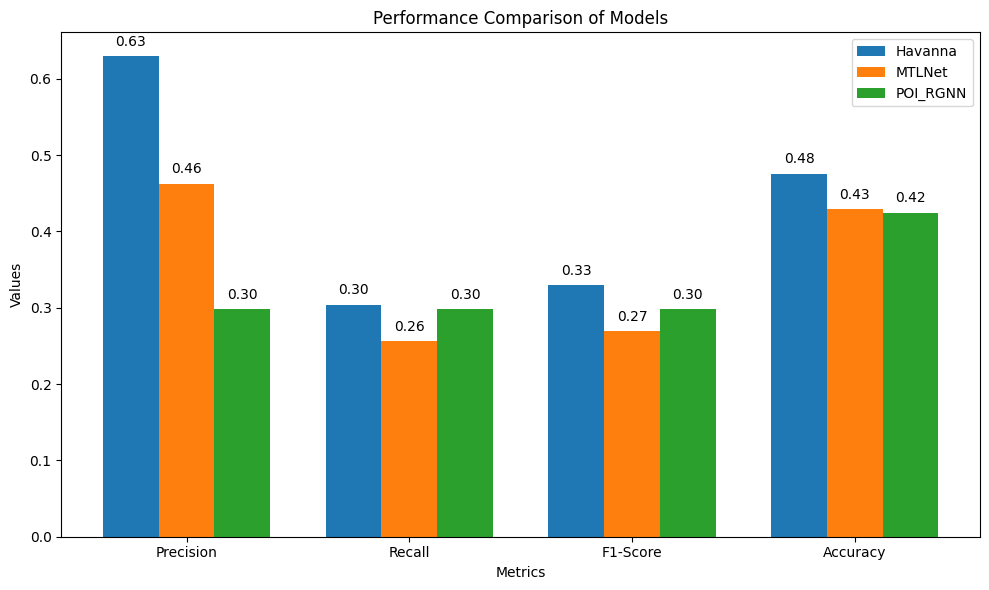

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file paths for each model
havanna_file = r"c:\Users\Tavares\Downloads\MTL\havanna\havanna\california\HAVANA.csv"
mtlnet_file = r"c:\Users\Tavares\Downloads\MTL\mtlnet\mtlnet\california\fold_1_category_metrics.csv"
poi_rgnn_file = r"c:\Users\Tavares\Downloads\MTL\poi_rgnn\poi_rgnn\california\fscore.csv"

# Load data from each file
havanna_data = pd.read_csv(havanna_file)
mtlnet_data = pd.read_csv(mtlnet_file)
poi_rgnn_data = pd.read_csv(poi_rgnn_file)

# Calculate metrics for Havanna
havanna_metrics = [
    havanna_data['precision'].mean(),  # Precision
    havanna_data['recall'].mean(),     # Recall
    havanna_data['f1-score'].mean(),   # F1-Score
    havanna_data['accuracy'].mean()    # Accuracy
]

# Calculate metrics for MTLNet
mtlnet_metrics = [
    mtlnet_data['Precision'].mean(),   # Precision
    mtlnet_data['Recall'].mean(),      # Recall
    mtlnet_data['F1-Score'].mean(),    # F1-Score
    float(mtlnet_data.loc[mtlnet_data['Category'] == 'Overall Accuracy', 'F1-Score'].values[0])  # Accuracy
]

# Calculate metrics for POI_RGNN
poi_rgnn_metrics = [
    poi_rgnn_data['macro avg'].mean(),  # Precision (macro avg)
    poi_rgnn_data['macro avg'].mean(),  # Recall (macro avg)
    poi_rgnn_data['macro avg'].mean(),  # F1-Score (macro avg)
    poi_rgnn_data['accuracy'].mean()    # Accuracy
]

# Create a summary DataFrame
summary_data = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Havanna': havanna_metrics,
    'MTLNet': mtlnet_metrics,
    'POI_RGNN': poi_rgnn_metrics
})

# Plot the data
x = np.arange(len(summary_data['Metric']))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each model
models = ['Havanna', 'MTLNet', 'POI_RGNN']
for i, model in enumerate(models):
    ax.bar(x + i * width, summary_data[model], width, label=model)

# Add values on top of each bar
for i, model in enumerate(models):
    for j, value in enumerate(summary_data[model]):
        if value is not None:  # Avoid plotting None values
            ax.text(x[j] + i * width, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

# Add labels, title, and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x + width)
ax.set_xticklabels(summary_data['Metric'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

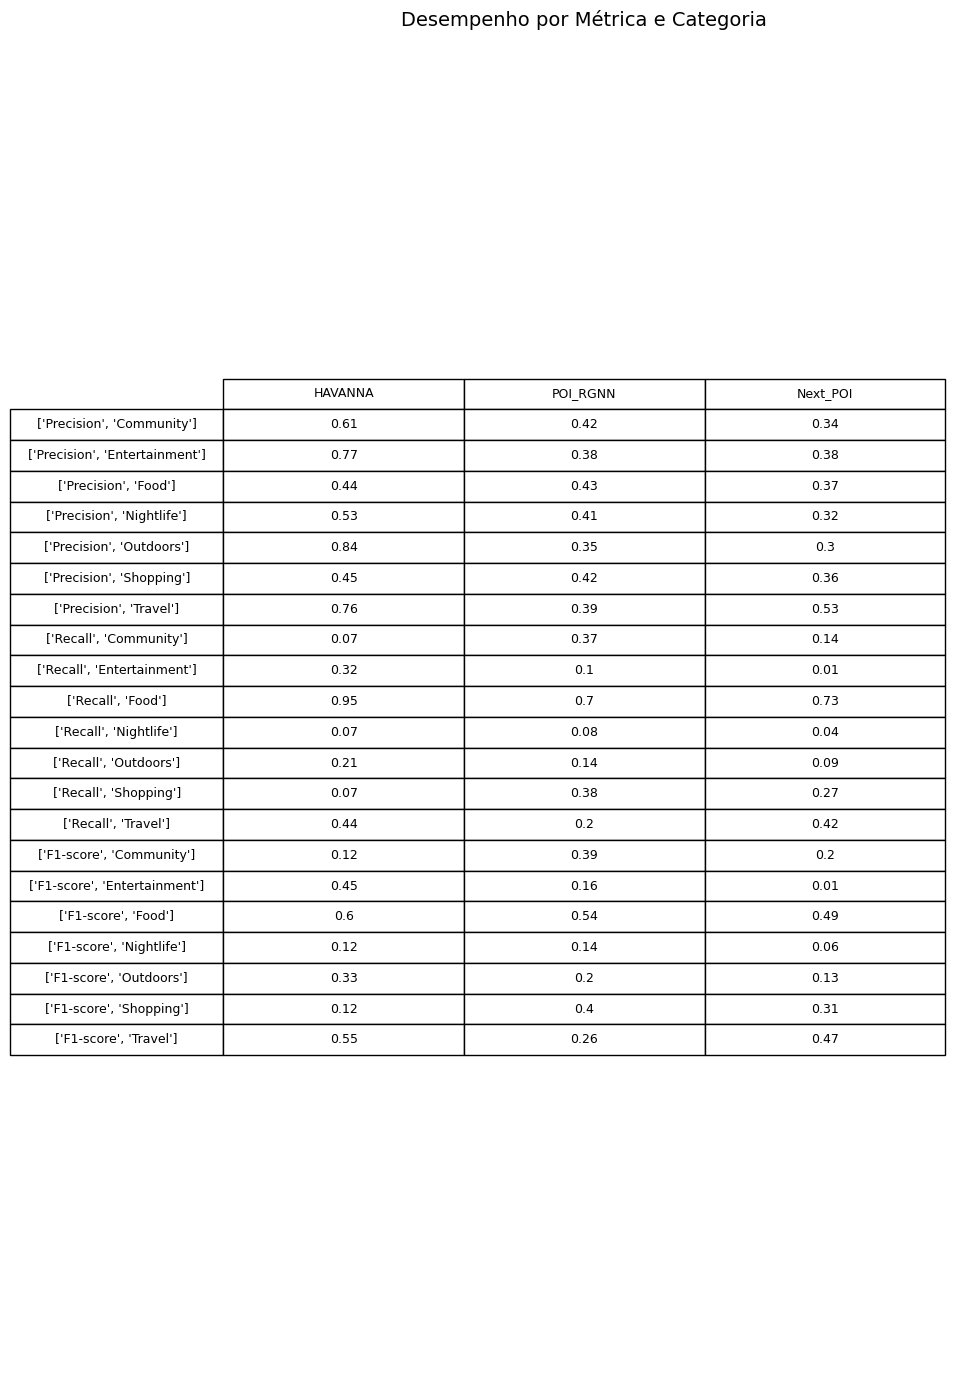

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento dos dados
havanna_data = pd.read_csv(r"c:\Users\Tavares\Downloads\MTL\havanna\havanna\california\HAVANA.csv")
summary_data = pd.read_csv(r"c:\Users\Tavares\Downloads\MTL\poi_rgnn\poi_rgnn\california\summary.csv")
summary_next_poi_data = pd.read_csv(r"c:\Users\Tavares\Downloads\MTL\mtlnet\mtlnet\california\summary_next_poi_metrics.csv")

# Função para processar os dados de cada modelo
def process_model(df, cat_col, cols, model_name):
    df = df.groupby(cat_col)[cols].mean()
    df = df.drop('macro avg', errors='ignore')
    df.columns = ['Precision', 'Recall', 'F1-score']
    df['Category'] = df.index
    df = df.reset_index(drop=True)
    df = df.melt(id_vars='Category', var_name='Metric', value_name=model_name)
    return df

# Processamento individual
havanna = process_model(havanna_data, 'category', ['precision', 'recall', 'f1-score'], 'HAVANNA')
summary = process_model(summary_data, 'Categoria', ['Precision', 'Recall', 'F1-Score'], 'POI_RGNN')
next_poi = process_model(summary_next_poi_data, 'Category', ['Precision', 'Recall', 'F1-Score'], 'Next_POI')

# Merge dos dados
df = havanna.merge(summary, on=['Category', 'Metric']).merge(next_poi, on=['Category', 'Metric'])

# Criar MultiIndex com Metric e Category
df.set_index(['Metric', 'Category'], inplace=True)

# Ordenar as linhas
df = df.loc[pd.MultiIndex.from_product([
    ['Precision', 'Recall', 'F1-score'],
    sorted(df.index.get_level_values(1).unique())
])]

# Criar a figura
fig, ax = plt.subplots(figsize=(10, 14))
ax.axis('off')
ax.axis('tight')

# Gerar labels hierárquicos como tuplas (para o efeito visual)
row_labels = df.index.to_frame(index=False).values.tolist()

# Criar a tabela
table = ax.table(
    cellText=df.round(2).values,
    rowLabels=row_labels,
    colLabels=df.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# Estilização
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Ajustar alinhamento da linha dupla
for i, key in enumerate(df.index):
    metric, cat = key
    cell = table[(i + 1, -1)]
    cell.set_text_props(va='center')

# Título
plt.title("Desempenho por Métrica e Categoria", fontsize=14, pad=20)
plt.tight_layout()
plt.show()
